In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

### combinatorial Laplacian

In [30]:
# n = 100
# p = 0.9
# eta = 0.

# # trivial connection

# q = 2
# rng = Random.default_rng()
# meta_g = gen_graph_mun(rng, n, p, eta)
# for e in edges(meta_g)
#     set_prop!(meta_g, e, :angle, 0.0)
# end

# SBM 2 groups
q = 0.1
c = [50 10;
10 50]
n = [250 ; 250]
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# q = 0.1
# c = [50 10 10;
# 10 50 10;
# 10 10 50]
# n = [200 ; 200; 200]
# g =  stochastic_block_model(c, n)
# meta_g = MetaGraph(g)
# for e in edges(meta_g)
#     set_prop!(meta_g, e, :angle, 0.0)
# end

B = magnetic_incidence(meta_g)
L = B * B'

n_batch = 6
n_rep = 5
q_system = 1e-12 # small regularizer for psd-ness
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng;q_system)


Dict{Any, Any} with 6 entries:
  "DPP unif" => Dict{String, Any}("sp_L_std"=>[162.835; 2134.38; … ; 2772.75; 1…
  "iid LS"   => Dict{String, Any}("sp_L_std"=>[1948.65; 3012.78; … ; 197.338; 1…
  "UST unif" => Dict{String, Any}("sp_L_std"=>[169.471; 2357.06; … ; 2410.83; 2…
  "iid unif" => Dict{String, Any}("sp_L_std"=>[1885.98; 1716.57; … ; 3362.01; 1…
  "DPP LS"   => Dict{String, Any}("sp_L_std"=>[523.428; 3727.2; … ; 2172.68; 18…
  "UST LS"   => Dict{String, Any}("sp_L_std"=>[612.331; 2609.66; … ; 2382.86; 2…

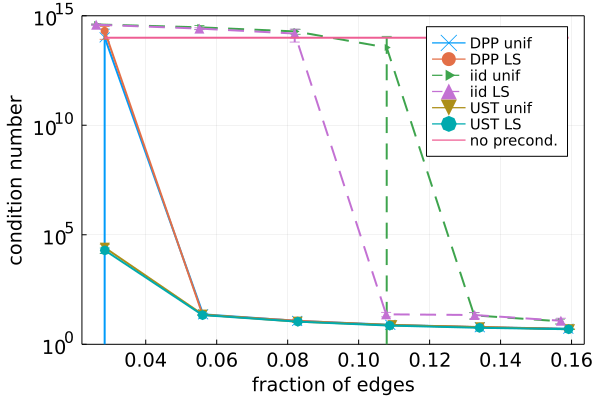

In [31]:
y_limits = (1, 1e15)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

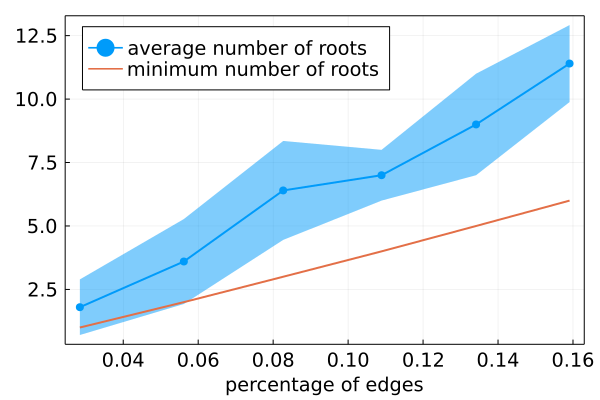

In [32]:
method = "DPP unif"
plot_nb_roots(D_all, method; legendposition=:topleft)

In [33]:
gplot(meta_g)